In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

In [2]:
project_path = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_path, 'datasets')
file_name = 'preprocessed_dataset_with_lyrics.csv'

In [3]:
df = pd.read_csv(os.path.join(dataset_path, file_name), index_col=0)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,song_id_from_src,dataset,title,artist,genre,arousal_mean,arousal_std,valence_mean,valence_std,emotion_4Q,emotion_2Q,lyrics,language,general_genre
0,1,PMEmo2019,Good Drank,2 Chainz,NaN,0.4000,0.156125,0.575,0.160078,relaxed,positive,"[Intro: 2 Chainz] Uhh, alright I did it, hahah...",en,NaN
2,5,PMEmo2019,No Heart,21 Savage,NaN,0.1500,0.175000,0.200,0.203101,sad,negative,"[Intro] Southside, Southside on the, Southside...",en,NaN
3,6,PMEmo2019,Red Opps,21 Savage,NaN,0.5125,0.171847,0.350,0.200000,angry,negative,"[Intro] Yeah, yeah, yeah I pull up roll the wi...",en,NaN
4,7,PMEmo2019,Girls Talk Boys,5 Seconds Of Summer,NaN,0.7000,0.139194,0.725,0.122474,happy,positive,"[Intro: All] When the girls, when the girls ta...",en,NaN
5,8,PMEmo2019,PRBLMS,6LACK,NaN,0.3875,0.246539,0.225,0.175000,sad,negative,"[Intro] Yeah, yeah Yeah, yeah Yeah, yeah Alrig...",en,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 3510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id_from_src  2601 non-null   object 
 1   dataset           2601 non-null   object 
 2   title             2601 non-null   object 
 3   artist            2601 non-null   object 
 4   genre             1519 non-null   object 
 5   arousal_mean      752 non-null    float64
 6   arousal_std       752 non-null    float64
 7   valence_mean      752 non-null    float64
 8   valence_std       752 non-null    float64
 9   emotion_4Q        2601 non-null   object 
 10  emotion_2Q        2601 non-null   object 
 11  lyrics            2601 non-null   object 
 12  language          2601 non-null   object 
 13  general_genre     1487 non-null   object 
dtypes: float64(4), object(10)
memory usage: 304.8+ KB


In [6]:
df.isna().sum()

song_id_from_src       0
dataset                0
title                  0
artist                 0
genre               1082
arousal_mean        1849
arousal_std         1849
valence_mean        1849
valence_std         1849
emotion_4Q             0
emotion_2Q             0
lyrics                 0
language               0
general_genre       1114
dtype: int64

Text(0.5, 6.79999999999999, 'Lyrics length')

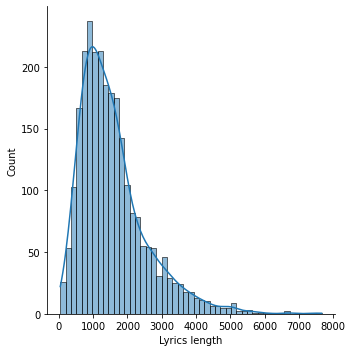

In [7]:
sns.displot(df['lyrics'].str.len(), kde=True)
plt.xlabel('Lyrics length')

Text(0.5, 6.79999999999999, 'Words num')

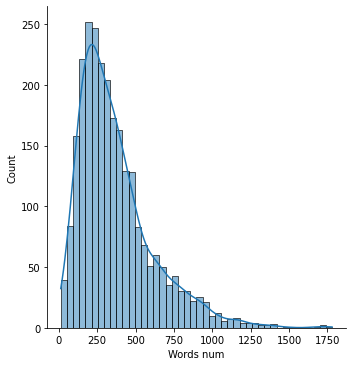

In [8]:
sns.displot(df.apply(lambda x: len(word_tokenize(x['lyrics'])), axis=1), kde=True)
plt.xlabel('Words num')

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

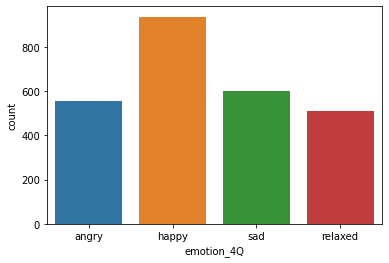

In [9]:
sns.countplot(x="emotion_4Q", data=df, order=['angry', 'happy', 'sad', 'relaxed'])

In [10]:
sorted(df.emotion_4Q.unique())

['angry', 'happy', 'relaxed', 'sad']

<AxesSubplot:xlabel='emotion_2Q', ylabel='count'>

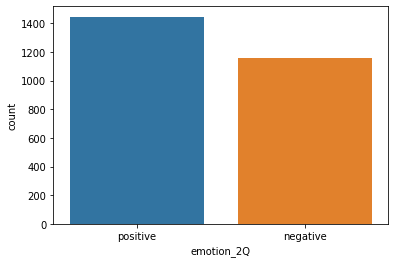

In [11]:
sns.countplot(x="emotion_2Q", data=df)

<AxesSubplot:xlabel='dataset', ylabel='count'>

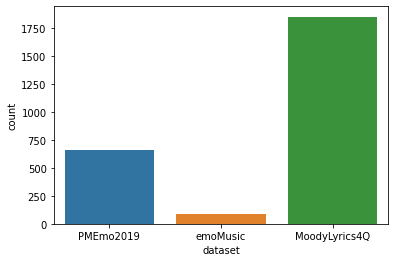

In [12]:
sns.countplot(x="dataset", data=df)

In [13]:
with pd.option_context('display.max_rows', None):
    display(df.genre.value_counts(dropna=False))

NaN                    1082
Pop                     178
Alternative Rock        143
Rock                    117
Hip-Hop                  90
Indie                    87
Thrash Metal             68
Metal                    51
Country                  49
Folk                     43
Electronic               40
Jazz                     37
R&B                      37
Soul                     36
Pop-Rock                 27
Heavy Metal              24
Alternative Metal        24
Industrial Metal         20
Rap Metal                19
Hard Rock                19
Progressive Metal        18
Punk Rock                17
New Wave                 16
Psychedelic Rock         15
House                    15
Progressive Rock         15
Nu Metal                 13
Synthpop                 13
New Age                  13
Blues                    13
Doom Metal               12
Funk                     12
Acoustic                 11
Post-Hardcore            10
Ska                       9
Swing               

In [14]:
with pd.option_context('display.max_rows', None):
    display(df.general_genre.value_counts(dropna=False))

NaN           1114
Rock           464
Pop            344
Metal          300
Hip-Hop        104
Country         95
Electronic      91
Jazz            89
Name: general_genre, dtype: int64

<AxesSubplot:xlabel='general_genre', ylabel='count'>

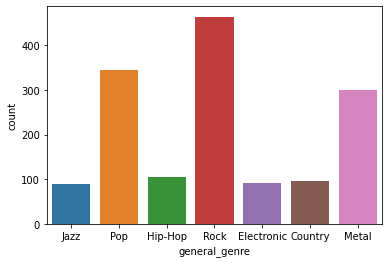

In [15]:
sns.countplot(x="general_genre", data=df)

Text(0, 0.5, 'arousal')

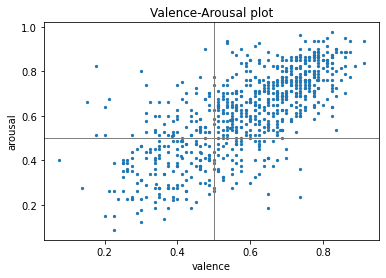

In [16]:
plt.scatter(df.valence_mean.values, df.arousal_mean.values, s=5)
plt.title('Valence-Arousal plot')
plt.axhline(0.5, color='grey', lw=1)
plt.axvline(0.5, color='grey', lw=1)
plt.xlabel('valence')
plt.ylabel('arousal')

In [17]:
train_df = pd.read_csv(os.path.join(dataset_path, 'train_dataset.csv'), index_col=0)
val_df = pd.read_csv(os.path.join(dataset_path, 'val_dataset.csv'), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, 'test_dataset.csv'), index_col=0)

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

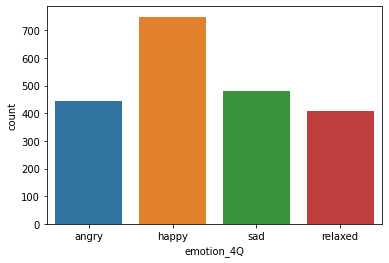

In [18]:
sns.countplot(x="emotion_4Q", data=train_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

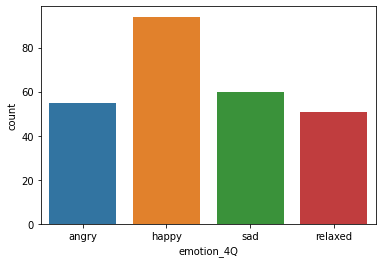

In [19]:
sns.countplot(x="emotion_4Q", data=val_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

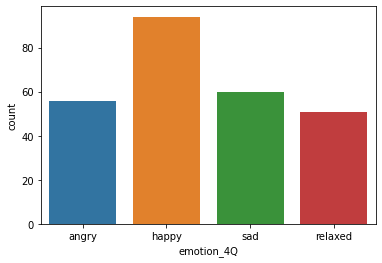

In [20]:
sns.countplot(x="emotion_4Q", data=test_df, order=['angry', 'happy', 'sad', 'relaxed'])